In [ ]:
#Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import Ridge,Lasso, ElasticNet, ElasticNetCV,LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

We need to import the neccessary library for dataset

**Question** - Import the dataset and display the output of dataset is succesfully imported

In [ ]:
#Importing the data

data = pd.read_csv('dataset-grid-toplology-1.csv',sep="\t", on_bad_lines='skip')
print("Dataset is suceesfully imported")
print(data.head())

Dataset is suceesfully imported
  No       Time  From      To         sourceaddress  destinationaddress  \
0  2  00:03.044     1  [25 d]    fe80::212:74011101  fe80::212:74033303   
1  3  00:03.993    20  [20 d]  fe80::212:7420202020  fe80::212:74044404   
2  4  00:03.993    24       0  fe80::212:7424242424                   0   
3  5  00:03.997    42  [10 d]  fe80::212:7442424242  fe80::212:74044404   
4  6  00:03.997    19       0  fe80::212:7419191919                   0   

      edgenodeaddress                           INSTANCE_ID     rank  \
0  fe80::212:74011101  87bb925b-d3ff-46a6-b339-7d48b8993bec   1024.0   
1  fe80::212:74000101  bd86a2f6-b3d6-4c67-a9d3-2a42904c243c      NaN   
2                   0  0233072f-b8cd-4189-818e-2a4e2b8f1ae7  65535.0   
3  fe80::212:74000101  c0a88d50-730f-4c1a-b21e-83c23f59d9b0      NaN   
4                   0  3c256cd4-9b1b-43e3-ab9d-a61f12a776ce  65535.0   

   rank_min  ...  hops  distance   node_type  node_honest_level  \
0       256  ... 

**Question** - How would you generate a comprehensive data profile report to understand the dataset better?"

In [ ]:
# Profile of Data - No. of Rows,Columns,Data Type,Data Byte,Null Values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    7554 non-null   object 
 1   Time                  7554 non-null   object 
 2   From                  7554 non-null   int64  
 3   To                    7554 non-null   object 
 4   sourceaddress         7554 non-null   object 
 5   destinationaddress    7554 non-null   object 
 6   edgenodeaddress       7554 non-null   object 
 7   INSTANCE_ID           7554 non-null   object 
 8   rank                  7237 non-null   float64
 9   rank_min              7554 non-null   int64  
 10  rank_max              7554 non-null   int64  
 11  node_id               7554 non-null   int64  
 12  ver                   7554 non-null   int64  
 13  ver_min               7554 non-null   int64  
 14  ver_max               7554 non-null   int64  
 15  ver_diff             

**Question** - Why is it important to standardize column names in a dataset

In [ ]:
#Changing the column name standardize because it will not confuse when i am choosing column name is either captial or title type.

data.columns = data.columns.str.lower()
data.columns

Index(['no', 'time', 'from', 'to', 'sourceaddress', 'destinationaddress',
       'edgenodeaddress', 'instance_id', 'rank', 'rank_min', 'rank_max',
       'node_id', 'ver', 'ver_min', 'ver_max', 'ver_diff', 'sending_time',
       'sending_rate', 'delta_time', 'received_packets', 'forward_packets',
       'drop_count', 'energy_consumption', 'etx', 'hops', 'distance',
       'node_type', 'node_honest_level', 'energy_efficiency_of',
       'lattency_min_of', 'pdr_of', 'congestion_of', 'throughput_opt_of',
       'data'],
      dtype='object')

**Question** - How can you identify and prioritize missing values in a dataset.

In [ ]:
# Null Values

data.isna().sum().sort_values(ascending = False)

,0
sending_time,7554
pdr_of,1044
rank,317
no,0
time,0
sourceaddress,0
destinationaddress,0
edgenodeaddress,0
instance_id,0
from,0


**Question** - Could you able to print the percentage of missing values in a dataset

In [ ]:
#Null Features will print the column name having the missing percent

na_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]
for features in na_features:
    print(f"{features}:{data[features].isnull().mean()*100: .3f}% missing value")

rank: 4.196% missing value
sending_time: 100.000% missing value
pdr_of: 13.820% missing value


Obs - The rank and pdr_of some missing value but the sending_time is column it null values

**Question** - How to do handle null value in data

In [ ]:
# Handling the null values

data.drop(['sending_time'],axis = 1,inplace = True)                 #Removing the column because the column has no values
data['rank'] = data['rank'].fillna(data['rank'].mode()[0])          #Filling with mode value
data['pdr_of'] = data['pdr_of'].fillna(data['pdr_of'].mode()[0])    #Filling with mode value
data.dropna()

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
0,2,00:03.044,1,[25 d],fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,1024.0,256,...,2,-12,EDGE_NODE,793,-0.000479,-1737107271769,0.01,0.25,0.044803,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,[20 d],fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,1024.0,256,...,2,128,CHILD_NODE,788,-0.000417,-1737107271609,0.01,0.25,0.043178,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,24,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,65535.0,256,...,1,256,CHILD_NODE,768,-0.000416,0,0.01,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,42,[10 d],fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,1024.0,256,...,1,128,CHILD_NODE,778,-0.000417,-1737107271609,0.01,0.25,0.041876,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,19,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,65535.0,256,...,1,256,CHILD_NODE,768,-0.000417,0,0.01,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00131313 001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7549,7840,01:22.721,2,[19 d],fe80::212:74022202,fe80::212:74088808,fe80::212:74000101,e9788a89-f329-44cc-bc46-4c3d2cde57c8,768.0,256,...,2,128,ROOT_NODE,787,0.001031,-1737107275089,0.01,0.25,0.045413,5: 0x02003873 08
7550,7841,01:22.725,24,[21 d],fe80::212:7424242424,fe80::212:74022202,fe80::212:74000101,e86ee8b2-72f2-429c-bd77-454d1ed1f954,1024.0,256,...,2,-12,CHILD_NODE,789,-0.000417,-1737107271998,0.01,0.25,0.042626,102: 0x61DC3ACD AB080808 00087412 00181818 001...
7551,7842,01:22.729,8,[31 d],fe80::212:74088808,fe80::212:74022202,fe80::212:74000101,967e901e-b5c5-4717-b25e-02591b249c9e,1280.0,256,...,3,-12,CHILD_NODE,799,0.001031,-1737107275090,0.01,0.25,0.043290,5: 0x02003A61 2B
7552,7843+1,01:22.734,46,[33 d],fe80::212:7446464646,fe80::212:74022202,fe80::212:74000101,de571653-5787-4332-9797-93a03d2cdade,1280.0,256,...,3,-12,CHILD_NODE,801,-0.000417,-1737107271998,0.01,0.25,0.039216,102: 0x61DC3CCD AB0A0A0A 000A7412 002E2E2E 002...


**Question** - How do you verify the no null value in data

In [ ]:
data.isnull().sum()

,0
no,0
time,0
from,0
to,0
sourceaddress,0
destinationaddress,0
edgenodeaddress,0
instance_id,0
rank,0
rank_min,0


In [ ]:
# Duplicated value

data[data.duplicated()]

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data


**Question** Write the code to print count of unique value in column

In [ ]:
# The unique values in the data in column

print("Unique values per column")
data.nunique().sort_values(ascending = True)

Unique values per column


,0
ver,1
ver_min,1
ver_diff,1
ver_max,1
rank_max,1
rank_min,1
pdr_of,1
congestion_of,2
distance,3
hops,3


**Question** - Print the unique value in column wise

In [ ]:
# The unique value in column wise

for i in data.columns:
    print(f"Unique value in {i}")
    print(data[i].unique() , '\n')

Unique value in no
['2' '3' '4' ... '7842' '7843+1' '7845'] 

Unique value in time
['00:03.044' '00:03.993' '00:03.997' ... '01:22.729' '01:22.734'
 '01:22.749'] 

Unique value in from
[ 1 20 24 42 19 21 28 32  4 17  9 41  6 12  3  2 34 33 46 29 51 15 37 14
 48 31 18 43 10 26 30 36 44 25  5 16  8 35 22 45 52 50 27 11 39 13 23 47
 40 38 49  7] 

Unique value in to
['[25 d]' '[20 d]' '0' '[10 d]' '[13 d]' '[3 d]' '[35 d]' '[19 d]' '[4 d]'
 '[43 d]' '[39 d]' '44' '[22 d]' '[17 d]' '[31 d]' '[23 d]' '[28 d]'
 '[27 d]' '[38 d]' '[24 d]' '[44 d]' '[8 d]' '[30 d]' '[26 d]' '[12 d]'
 '[21 d]' '[5 d]' '[11 d]' '[6 d]' '[33 d]' '[7 d]' '[34 d]' '[41 d]'
 '[36 d]' '[42 d]' '[14 d]' '24,32' '26,34' '[37 d]' '41' '38,40' '[29 d]'
 '[32 d]' '[18 d]' '1,31' '[9 d]' '2,30' '31' '1,34' '24,30' '[16 d]'
 '[15 d]' '31,51' '32' '22' '2' '26' '34' '13,26' '1' '7,22' '49' '24'] 

Unique value in sourceaddress
['fe80::212:74011101' 'fe80::212:7420202020' 'fe80::212:7424242424'
 'fe80::212:7442424242' 'fe80::

**Question** - Write a function to print only the numeric value from alpha number value.

In [ ]:
import re

def get_number(d):
    if isinstance(d, str):
        numbers = re.findall(r'\d+', d)
        return numbers[0] if numbers else '0'
    return '0'

In [ ]:
data['to'] = data['to'].apply(get_number)

In [ ]:
data['to'].unique()

array(['25', '20', '0', '10', '13', '3', '35', '19', '4', '43', '39',
       '44', '22', '17', '31', '23', '28', '27', '38', '24', '8', '30',
       '26', '12', '21', '5', '11', '6', '33', '7', '34', '41', '36',
       '42', '14', '37', '29', '32', '18', '1', '9', '2', '16', '15',
       '49'], dtype=object)

In [ ]:
data.loc[data['sending_rate'] == 0]

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
4892,5086,01:01.349,27,31,fe80::212:7427272727,fe80::212:74022202,fe80::212:74000101,26480cd7-3eba-4c7e-9b36-2b759517d481,1280.0,256,...,3,-12,CHILD_NODE,799,-0.000416,-1737107271957,0.01,0.25,0.041254,102: 0x61DC36CD AB0A0A0A 000A7412 001B1B1B 001...


In [ ]:
data['sending_rate'].value_counts()

,count
sending_rate,
5,4277
6,3058
2,100
3,60
4,58
0,1


In [ ]:
mode_value = data['sending_rate'].mode()[0]

def replace_zero(x):
    if x == 0:
        return mode_value
    return x

data['sending_rate'] = data['sending_rate'].apply(replace_zero)

In [ ]:
data['sending_rate'].value_counts()

,count
sending_rate,
5,4278
6,3058
2,100
3,60
4,58


**Question** - Write a function to print the numerical datatype column

In [ ]:
#Numerical Features

numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
print("No. of Numerical Column: ",len(numerical_feature))
data[numerical_feature].head()

No. of Numerical Column:  24


,from,rank,rank_min,rank_max,node_id,ver,ver_min,ver_max,ver_diff,sending_rate,...,energy_consumption,etx,hops,distance,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of
0,1,1024.0,256,2048,1,240,0,240,240,2,...,3088,372,2,-12,793,-0.000479,-1737107271769,0.01,0.25,0.044803
1,20,1024.0,256,2048,20,240,0,240,240,2,...,3400,386,2,128,788,-0.000417,-1737107271609,0.01,0.25,0.043178
2,24,65535.0,256,2048,24,240,0,240,240,2,...,3401,256,1,256,768,-0.000416,0,0.01,0.00,0.065104
3,42,1024.0,256,2048,42,240,0,240,240,2,...,3400,398,1,128,778,-0.000417,-1737107271609,0.01,0.25,0.041876
4,19,65535.0,256,2048,19,240,0,240,240,2,...,3400,256,1,256,768,-0.000417,0,0.01,0.00,0.065104


**Question** - Write a function to print the categorical datatype column

In [ ]:
# Categorical Columns

categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
print("No. of Categorical Column: ",len(categorical_feature))
data[categorical_feature].head()

No. of Categorical Column:  9


,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,EDGE_NODE,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,10,fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00131313 001...


**Question** - Print the five 'M' values

In [ ]:
#Statistical Analysis - Mean,Median,Mode,Min and Max

print("Numerical Statistical Analysis")
print(data[numerical_feature].describe().T)
print("=" * 90)
print("Categorical Statistical Analysis")
print(data[categorical_feature].describe().T)

Numerical Statistical Analysis
                       count          mean           std           min  \
from                  7554.0  2.311967e+01  1.550347e+01  1.000000e+00   
rank                  7554.0  9.355123e+03  2.154075e+04  5.120000e+02   
rank_min              7554.0  2.560000e+02  0.000000e+00  2.560000e+02   
rank_max              7554.0  2.048000e+03  0.000000e+00  2.048000e+03   
node_id               7554.0  2.311967e+01  1.550347e+01  1.000000e+00   
ver                   7554.0  2.400000e+02  0.000000e+00  2.400000e+02   
ver_min               7554.0  0.000000e+00  0.000000e+00  0.000000e+00   
ver_max               7554.0  2.400000e+02  0.000000e+00  2.400000e+02   
ver_diff              7554.0  2.400000e+02  0.000000e+00  2.400000e+02   
sending_rate          7554.0  5.341541e+00  6.684453e-01  2.000000e+00   
delta_time            7554.0  2.156812e+07  1.635172e+02  2.156792e+07   
received_packets      7554.0  9.804876e+02  1.411417e+03  0.000000e+00   
forward

**Question** - How can you identify discrete numerical features in a dataset where the unique values are less than 100, and display their count along with the first few rows of those features?

In [ ]:
# Discrete Features
discrete_feature = [feature for feature in data[numerical_feature] if data[numerical_feature][feature].nunique() < 100]
print("Discrete Variables Count:", len(discrete_feature))

print(data[discrete_feature].head())

Discrete Variables Count: 18
   from     rank  rank_min  rank_max  node_id  ver  ver_min  ver_max  \
0     1   1024.0       256      2048        1  240        0      240   
1    20   1024.0       256      2048       20  240        0      240   
2    24  65535.0       256      2048       24  240        0      240   
3    42   1024.0       256      2048       42  240        0      240   
4    19  65535.0       256      2048       19  240        0      240   

   ver_diff  sending_rate  drop_count  etx  hops  distance  node_honest_level  \
0       240             2          25  372     2       -12                793   
1       240             2          20  386     2       128                788   
2       240             2           0  256     1       256                768   
3       240             2          10  398     1       128                778   
4       240             2           0  256     1       256                768   

   pdr_of  congestion_of  throughput_opt_of  
0    

**Question** - How can you identify continous numerical features in a dataset where the unique values are more than 100, and display their count along with the first few rows of those features?

In [ ]:
# Continous Features
continous_feature = [feature for feature in data[numerical_feature] if data[numerical_feature][feature].nunique() > 100]
print("Continous Variables Count:", len(continous_feature))

print(data[continous_feature].head())

Continous Variables Count: 6
   delta_time  received_packets  forward_packets  energy_consumption  \
0    21567917              3395             3420                3088   
1    21567917              3440             3460                3400   
2    21567917                 0                0                3401   
3    21567917                10               20                3400   
4    21567917                 0                0                3400   

   energy_efficiency_of  lattency_min_of  
0             -0.000479   -1737107271769  
1             -0.000417   -1737107271609  
2             -0.000416                0  
3             -0.000417   -1737107271609  
4             -0.000417                0  


**Question** - How can you compute and display the covariance matrix for numerical features in a dataset

In [ ]:
# Covariance

cov_matrix = data[numerical_feature].cov().round(4)
print(cov_matrix)

                              from          rank  rank_min  rank_max  \
from                  2.403574e+02  7.950892e+02       0.0       0.0   
rank                  7.950892e+02  4.640038e+08       0.0       0.0   
rank_min              0.000000e+00  0.000000e+00       0.0       0.0   
rank_max              0.000000e+00  0.000000e+00       0.0       0.0   
node_id               2.403574e+02  7.950892e+02       0.0       0.0   
ver                   0.000000e+00  0.000000e+00       0.0       0.0   
ver_min               0.000000e+00  0.000000e+00       0.0       0.0   
ver_max               0.000000e+00  0.000000e+00       0.0       0.0   
ver_diff              0.000000e+00  0.000000e+00       0.0       0.0   
sending_rate         -2.710000e-02 -2.506388e+03       0.0       0.0   
delta_time            2.297870e+01 -2.703350e+05       0.0       0.0   
received_packets     -4.358022e+02 -8.067497e+06       0.0       0.0   
forward_packets      -4.176785e+02 -8.268580e+06       0.0      

**Question** - How can you compute and display the correlation matrix for numerical features in a dataset.

In [ ]:
# Correlation

corr_matrix = data[numerical_feature].corr().round(4)
print(corr_matrix)

                        from    rank  rank_min  rank_max  node_id  ver  \
from                  1.0000  0.0024       NaN       NaN   1.0000  NaN   
rank                  0.0024  1.0000       NaN       NaN   0.0024  NaN   
rank_min                 NaN     NaN       NaN       NaN      NaN  NaN   
rank_max                 NaN     NaN       NaN       NaN      NaN  NaN   
node_id               1.0000  0.0024       NaN       NaN   1.0000  NaN   
ver                      NaN     NaN       NaN       NaN      NaN  NaN   
ver_min                  NaN     NaN       NaN       NaN      NaN  NaN   
ver_max                  NaN     NaN       NaN       NaN      NaN  NaN   
ver_diff                 NaN     NaN       NaN       NaN      NaN  NaN   
sending_rate         -0.0026 -0.1741       NaN       NaN  -0.0026  NaN   
delta_time            0.0091 -0.0767       NaN       NaN   0.0091  NaN   
received_packets     -0.0199 -0.2654       NaN       NaN  -0.0199  NaN   
forward_packets      -0.0190 -0.2713  

**Question** - How can you calculate and display the skewness of numerical features in a dataset.

In [ ]:
data[numerical_feature].skew().round(4)

,0
from,0.1272
rank,2.2250
rank_min,0.0000
rank_max,0.0000
node_id,0.1272
ver,0.0000
ver_min,0.0000
ver_max,0.0000
ver_diff,0.0000
sending_rate,-1.7465


**Question** - How can you calculate and display the kurtosis of numerical features in a dataset

In [ ]:
data[numerical_feature].kurtosis().round(4)

,0
from,-1.1901
rank,2.9522
rank_min,0.0000
rank_max,0.0000
node_id,-1.1901
ver,0.0000
ver_min,0.0000
ver_max,0.0000
ver_diff,0.0000
sending_rate,7.0154


**Question** - How can you perform a univariate analysis of discrete features in a dataset by plotting their distribution.

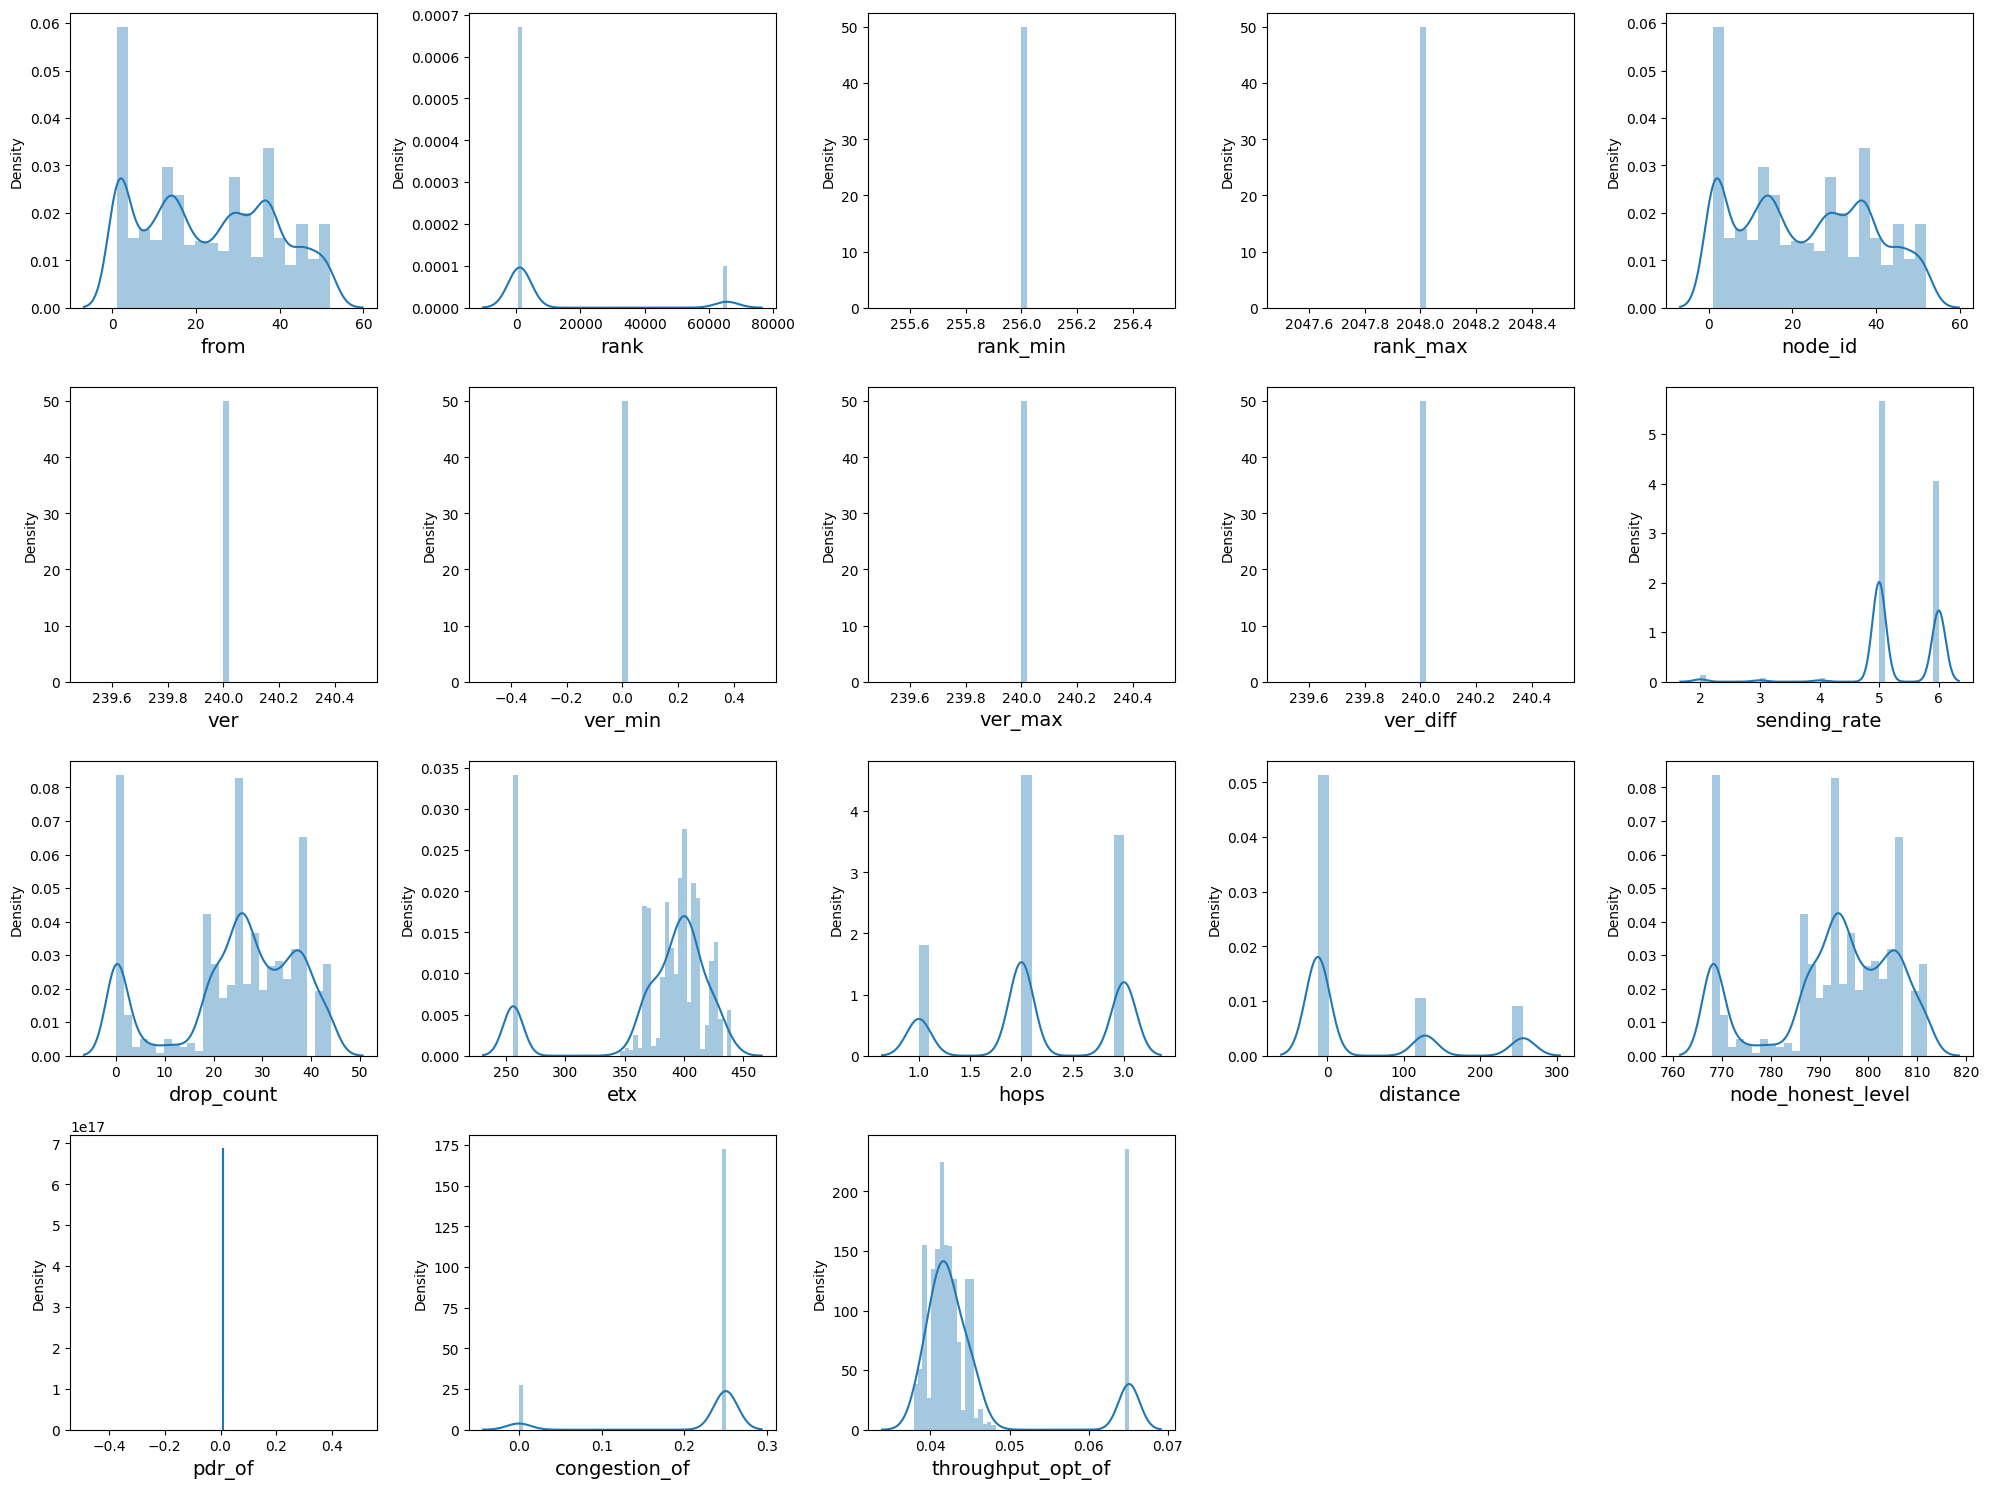

In [ ]:
#Univariate Analysis of discrete feature

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in data[discrete_feature]:
    if plotnumber < 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber += 1
plt.tight_layout()

**Question** - How can you perform a univariate analysis of continous features in a dataset by plotting their distribution.

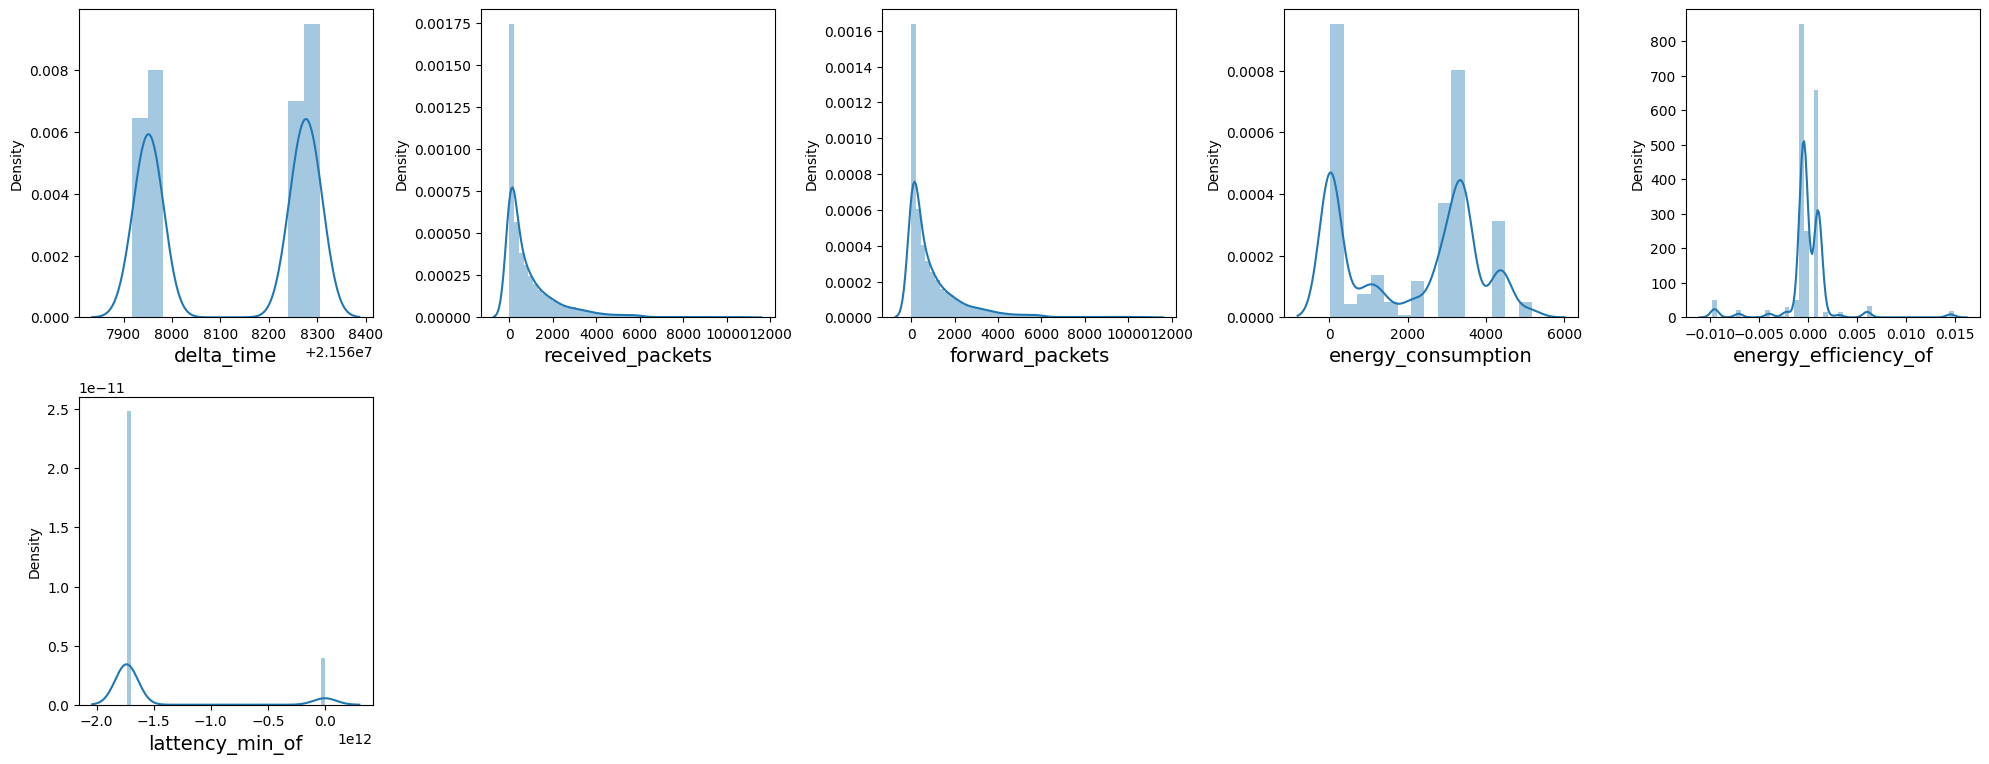

In [ ]:
#Univariate Analysis of continous feature

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in data[continous_feature]:
    if plotnumber < 36:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber += 1
plt.tight_layout()

In [ ]:
data[categorical_feature].head()

,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,EDGE_NODE,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,10,fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [ ]:
import hashlib

def hash_value(value):
    """
    Hashes IPv6 addresses using MD5 and UUIDs using SHA-256.
    Returns a hashed integer in the range (0 to 10**8).
    """
    if pd.isna(value) or value == '0':
        return 0
    elif '::' in value:
        return int(hashlib.md5(value.encode()).hexdigest(),16) % (10*8)
    elif "-" in value:
        return int(hashlib.sha256(value.encode()).hexdigest(),16) % (10*8)
    else:
        return None

UUIDs are randomly generated but may have patterns.
SHA-256 provides a stronger hash function with fewer collisions.
Although SHA-256 is slower than MD5, it ensures better randomness and uniqueness for UUIDs.

In [ ]:
columns_to_hash = ['edgenodeaddress', 'sourceaddress', 'destinationaddress', 'instance_id','data']

In [ ]:
data[columns_to_hash] = data[columns_to_hash].applymap(hash_value)

In [ ]:
data[columns_to_hash]

,edgenodeaddress,sourceaddress,destinationaddress,instance_id,data
0,69,69,58,51,None
1,22,6,30,59,None
2,0,49,0,77,None
3,22,49,30,10,None
4,0,22,0,39,None
...,...,...,...,...,...
7549,22,74,41,3,None
7550,22,49,74,3,None
7551,22,41,74,60,None
7552,22,36,74,35,None


In [ ]:
data.sample(3)

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
5192,5397,01:04.208,11,25,67,74,22,33,1024.0,256,...,2,-12,CHILD_NODE,793,-0.000416,-1737107271962,0.01,0.25,0.043630,None
7095,7369,01:19.292,12,25,60,69,22,44,1024.0,256,...,2,-12,CHILD_NODE,793,-0.000417,-1737107271992,0.01,0.25,0.043516,None
3076,3180,00:43.255,1,25,69,58,69,14,1024.0,256,...,2,-12,EDGE_NODE,793,-0.000802,-1737107272300,0.01,0.25,0.044803,None


In [ ]:
data[categorical_feature].head()

,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,69,58,69,51,EDGE_NODE,None
1,3,00:03.993,20,6,30,22,59,CHILD_NODE,None
2,4,00:03.993,0,49,0,0,77,CHILD_NODE,None
3,5,00:03.997,10,49,30,22,10,CHILD_NODE,None
4,6,00:03.997,0,22,0,0,39,CHILD_NODE,None


**Question** - How can you visualize the distribution of the 'node_type' column in a dataset.

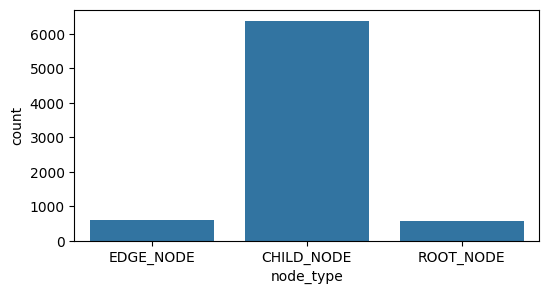

In [ ]:
plt.figure(figsize = (6,3))
sns.countplot(data=data, x='node_type')
plt.show()

**Question** - How can you visualize the distribution of the 'sourceaddress' column in a dataset

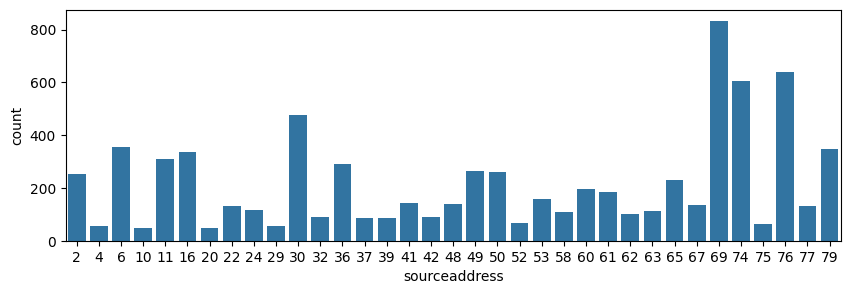

In [ ]:
plt.figure(figsize = (10,3))
sns.countplot(data=data, x='sourceaddress')
plt.show()

**Question** - How can you visualize the distribution of the 'destinationaddress' column in a dataset.

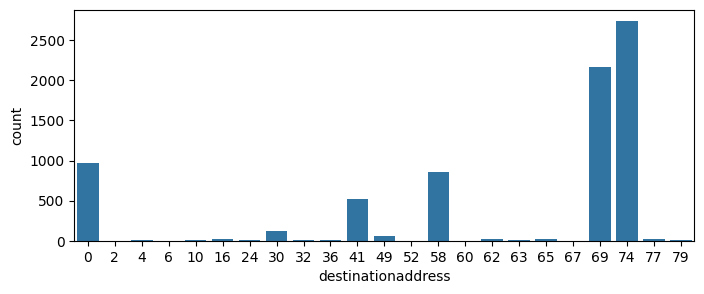

In [ ]:
plt.figure(figsize = (8,3))
sns.countplot(data=data, x='destinationaddress')
plt.show()

**Question** - How can you visualize the distribution of the 'edgenodeaddress' column in a dataset

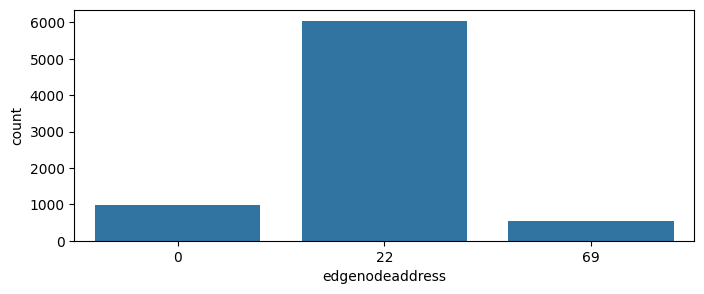

In [ ]:
plt.figure(figsize = (8,3))
sns.countplot(data=data, x='edgenodeaddress')
plt.show()

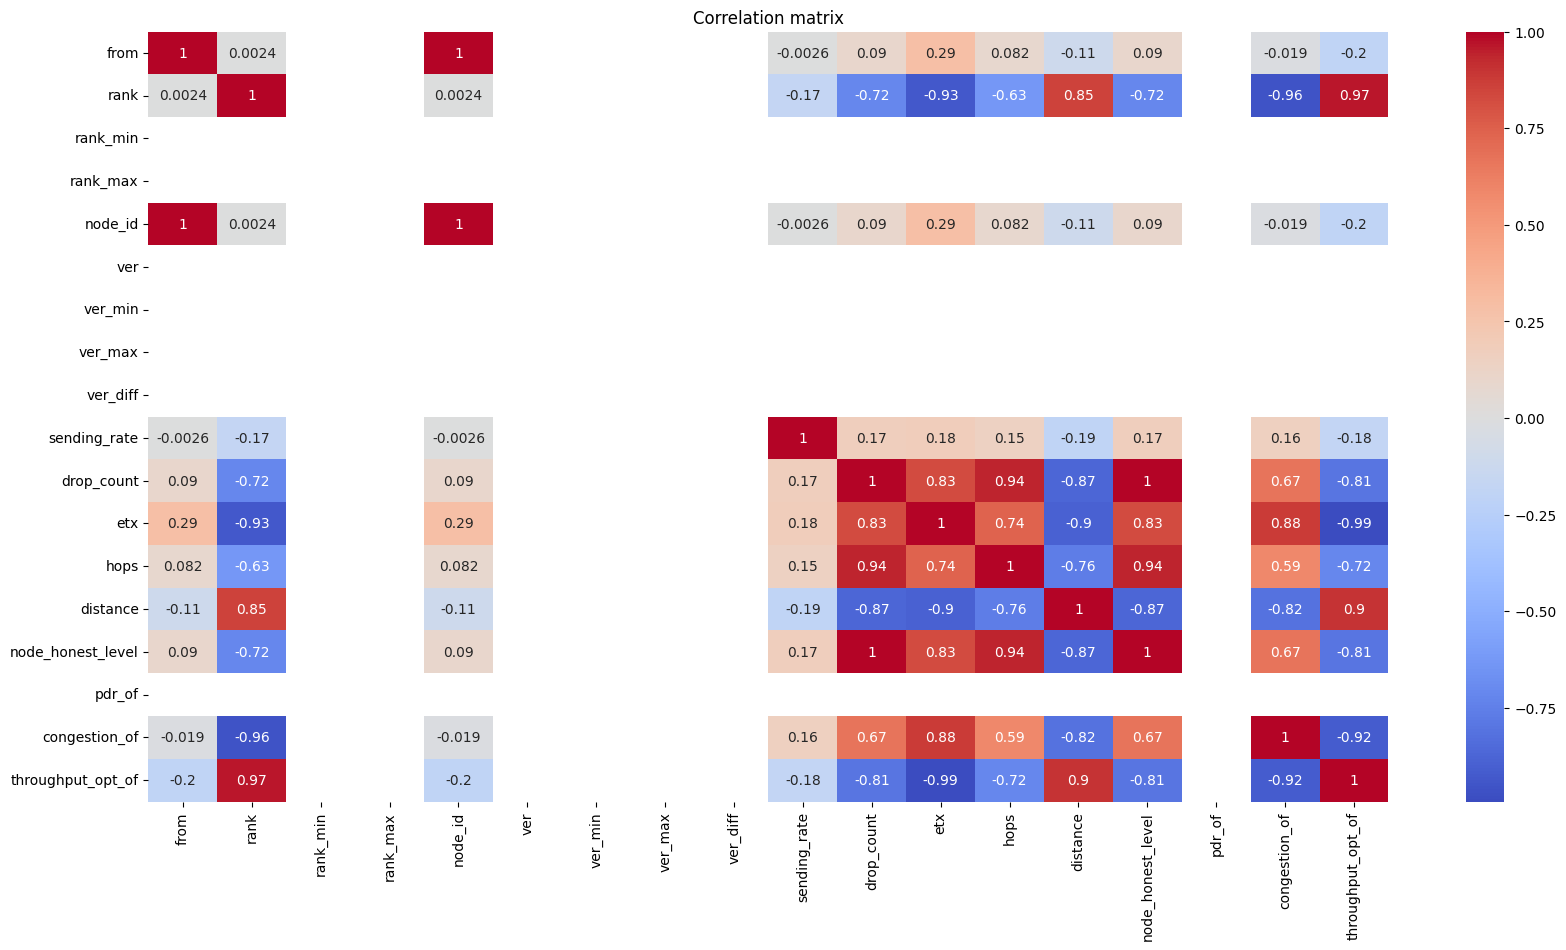

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data[discrete_feature].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

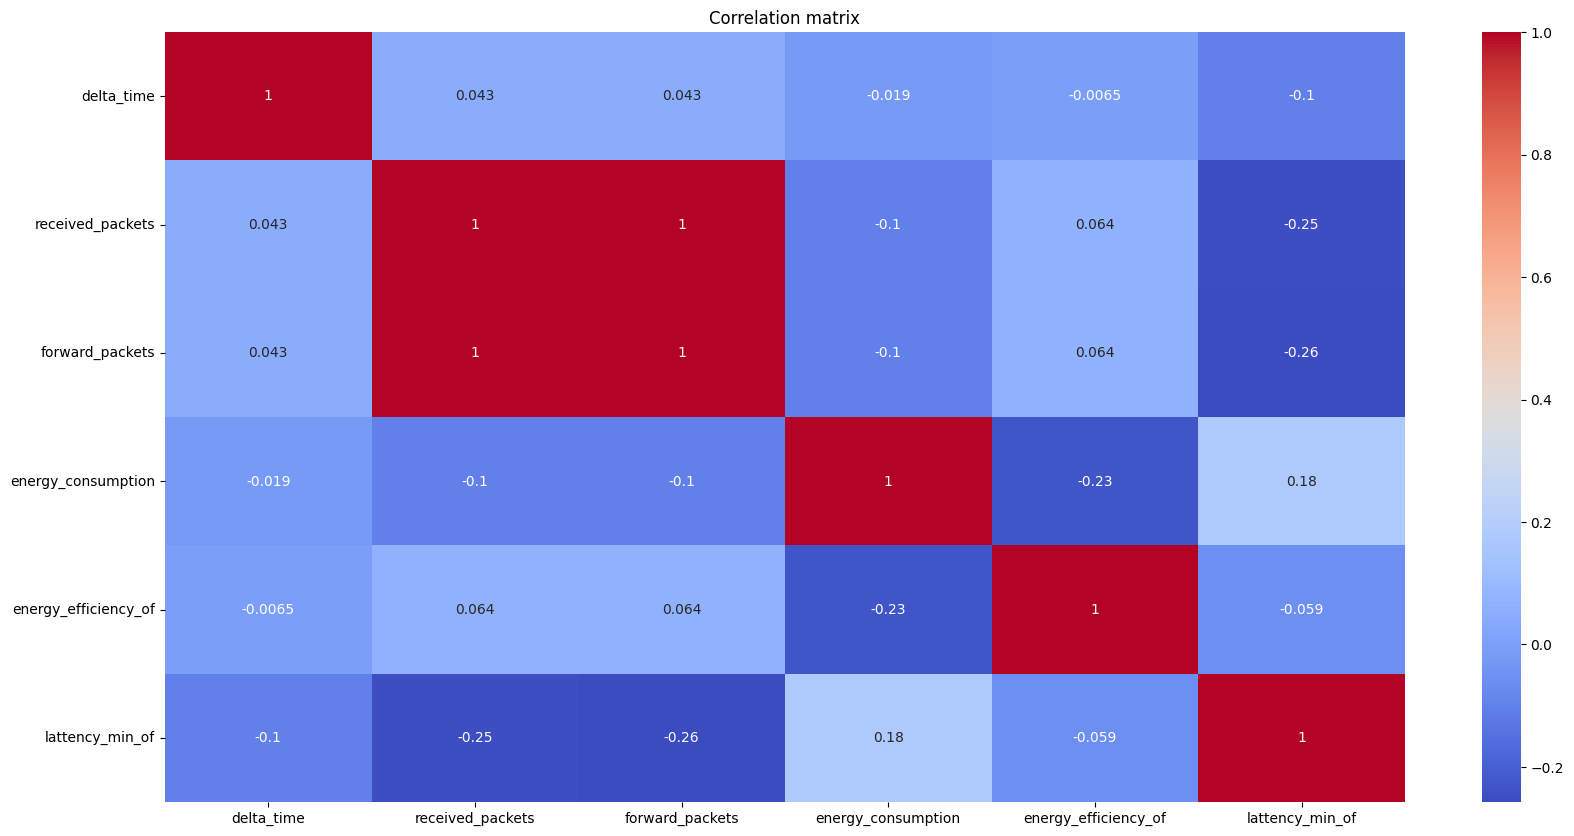

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data[continous_feature].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

In [ ]:
#sns.pairplot(data[discrete_feature])

In [ ]:
#sns.pairplot(data[continous_feature])

In [ ]:
data = pd.get_dummies(data, columns=['node_type'], drop_first=True)

In [ ]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)  # First quartile
    Q3 = df[columns].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Filter data to keep only values within 1.5 * IQR
    filtered_df = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

numerical_feature = data.select_dtypes(include=['int64', 'float64']).columns
data_cleaned = remove_outliers_iqr(data, numerical_feature)

print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)


Original Data Shape: (7554, 34)
Cleaned Data Shape: (4711, 34)


In [ ]:
data_cleaned.head()

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,distance,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data,node_type_EDGE_NODE,node_type_ROOT_NODE
158,160,00:04.739,43,12,69,58,22,2,768.0,256,...,128,780,-0.000416,-1737107271614,0.01,0.25,0.041563,None,False,False
162,164,00:04.777,43,12,69,58,22,27,768.0,256,...,128,780,-0.000417,-1737107271616,0.01,0.25,0.041563,None,False,False
164,166,00:04.794,30,21,61,74,22,47,1024.0,256,...,-12,789,-0.000416,-1737107271615,0.01,0.25,0.041982,None,False,False
165,167,00:04.797,2,19,74,41,22,47,768.0,256,...,128,787,0.001031,-1737107274709,0.01,0.25,0.045413,None,False,True
166,168,00:04.817,43,12,69,58,22,1,768.0,256,...,128,780,-0.000416,-1737107271615,0.01,0.25,0.041563,None,False,False


In [ ]:
data_cleaned = data_cleaned.drop(['rank_min','rank_max','ver','ver_min','ver_max','ver_diff','data'],axis=1)

In [ ]:
X = data_cleaned.drop(['energy_efficiency_of'],axis = 1)
y = data_cleaned['energy_efficiency_of']

In [ ]:
X = X.replace(r'[^0-9.]', '', regex=True)  # Remove non-numeric characters
X = X.astype(float)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.05287714, -0.61415728,  0.73913043, ..., -0.05009383,
         0.        ,  0.        ],
       [-1.05184033, -0.61366072,  0.73913043, ..., -0.05009383,
         0.        ,  0.        ],
       [-1.05132193, -0.61343857,  0.17391304, ...,  0.15179565,
         0.        ,  0.        ],
       ...,
       [ 0.9380508 ,  0.92761937, -0.08695652, ...,  0.462375  ,
         0.        ,  0.        ],
       [ 0.93831001,  0.92767164, -0.7826087 , ...,  0.78263474,
         0.        ,  0.        ],
       [19.2350959 ,  0.92773698,  0.86956522, ..., -1.181625  ,
         0.        ,  0.        ]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3768, 26)
(943, 26)
(3768,)
(943,)


In [ ]:
# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Elasticnet Regression": ElasticNet(),
    "Elasticnetcv Regression": ElasticNetCV(cv=5),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(kernel='linear'),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)

    # Training Set Evaluation
    train_mse = mean_squared_error(y_train, pred_y_train)
    train_mae = mean_absolute_error(y_train, pred_y_train)
    train_r2 = r2_score(y_train, pred_y_train)

    # Testing Set Evaluation
    test_mse = mean_squared_error(y_test, pred_y_test)
    test_mae = mean_absolute_error(y_test, pred_y_test)
    test_r2 = r2_score(y_test, pred_y_test)

    print(f"\nModel: {name}")
    print("Training Set Performance")
    print(f"- MSE: {train_mse:.5f}")
    print(f"- MAE: {train_mae:.5f}")
    print(f"- R² Score: {train_r2:.5f}")

    print("----------------------------------")


    print("Testing Set Performance")
    print(f"- MSE: {test_mse:.5f}")
    print(f"- MAE: {test_mae:.5f}")
    print(f"- R² Score: {test_r2:.5f}")




    print("+" * 35)



Model: Linear Regression
Training Set Performance
- MSE: 0.00000
- MAE: 0.00012
- R² Score: 0.82749
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00012
- R² Score: 0.85113
+++++++++++++++++++++++++++++++++++

Model: Elasticnet Regression
Training Set Performance
- MSE: 0.00000
- MAE: 0.00041
- R² Score: 0.54060
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00040
- R² Score: 0.56172
+++++++++++++++++++++++++++++++++++

Model: Elasticnetcv Regression
Training Set Performance
- MSE: 0.00000
- MAE: 0.00010
- R² Score: 0.82296
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00009
- R² Score: 0.85158
+++++++++++++++++++++++++++++++++++

Model: Decision Tree Regressor
Training Set Performance
- MSE: 0.00000
- MAE: 0.00000
- R² Score: 1.00000
----------------------------------
Testing Set Performance
- MSE: 0.00000
- MAE: 0.00000
- R² Score: 1.00000
+++++++++++++++++++++++++++++++++++


In [ ]:
# Decision Tree Regressor with Hyperparameter Tuning

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dtr = DecisionTreeRegressor()
dtr_rscv = RandomizedSearchCV(dtr, param_grid, cv=5, scoring='r2')
dtr_rscv.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dtr_rscv.best_params_)

Best Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}


In [ ]:
final_dtr = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=1,max_features=None,max_depth=None)
final_dtr.fit(X_train, y_train)
final_dtr_pred = final_dtr.predict(X_test)
final_dtr_r2 = r2_score(y_test, final_dtr_pred)
print("Final Decision Tree Performance")
print(f"- R² Score: {final_dtr_r2:.5f}")

Final Decision Tree Performance
- R² Score: 1.00000


In [ ]:
# Random Forest Regressor with Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
rf = RandomForestRegressor()
rf_rvcv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_rvcv.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_rvcv.best_params_)

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}


In [ ]:
final_rfr = RandomForestRegressor(n_estimators=200, min_samples_split=5,min_samples_leaf=1,max_features=None,max_depth=None)
final_rfr.fit(X_train, y_train)
final_rfr_pred = final_rfr.predict(X_test)
final_rfr_r2 = r2_score(y_test, final_rfr_pred)
print("Final Random Forest Performance")
print(f"- R² Score: {final_rfr_r2:.5f}")

Final Random Forest Performance
- R² Score: 0.99999


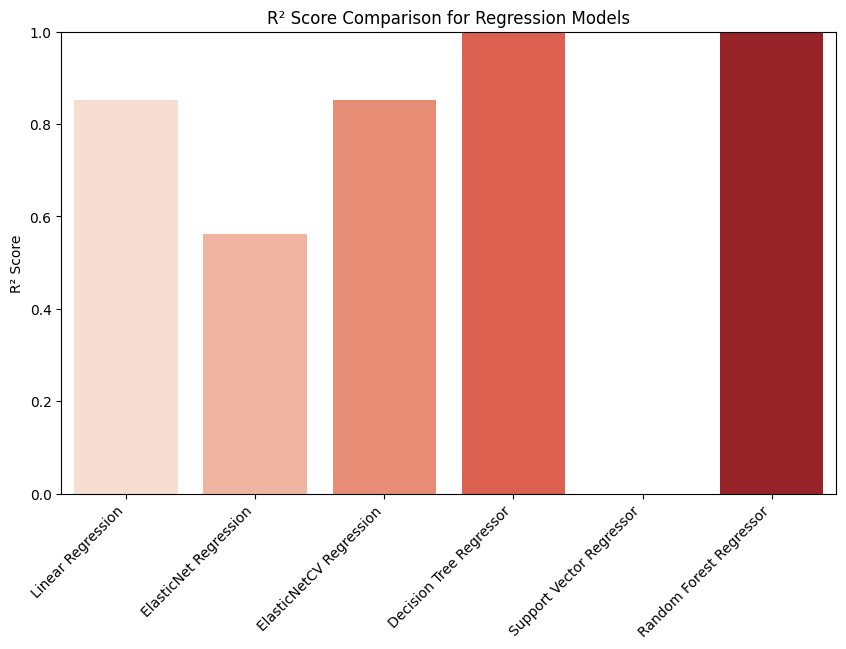

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet Regression": ElasticNet(),
    "ElasticNetCV Regression": ElasticNetCV(cv=5),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(kernel='linear',C=1.0,epsilon=0.1),
    "Random Forest Regressor": RandomForestRegressor()
}

# Store R² scores
test_r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred_y_test = model.predict(X_test)

    test_r2 = r2_score(y_test, pred_y_test)
    test_r2_scores.append(test_r2)

x_labels = list(models.keys())

# Plot R² Score
plt.figure(figsize=(10, 6))
sns.barplot(x=x_labels, y=test_r2_scores, palette="Reds")
plt.title("R² Score Comparison for Regression Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)

# Show plot
plt.show()

 Since Random Forest is an ensemble of multiple decision trees, it often performs better than a single Decision Tree. The Random forest performs well in training and testing. The ElasticNetCV Regresion Outperforms Linear Regression and ElasticNet with good generalization.